# Vermont Farm Data 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from source import Vermont_Farm
VF = Vermont_Farm()

In [2]:
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
df = pd.read_csv('./1860Midd_final.csv')
df = df.drop(columns="rown", axis=1)

In [5]:
prices = pd.read_csv("./Hist_Firm_mathodology_table_Variable_name_final.csv")

In [6]:
df.shape

(159, 51)

In [7]:
# print(df.columns)
# print(prices_np[:,0])

In [8]:
print(df.shape)
print(prices.shape)
# print(df.columns)

(159, 51)
(51, 5)


In [9]:
prices=prices.fillna(0)
df_np = df.to_numpy()
prices_np = prices.to_numpy()

In [10]:
df_np[0,:]

array(['Carlos Harris', 38, 11, 1200, 50, 2, 0, 1, 0, 4, 0, 0, 210, 8, 80,
       30, 85, 0, 0, 0, 0, 2, 250, 0, 0, 5, 0, 0, 0, 150, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 28, 57, 1860, 'Middlebury'],
      dtype=object)

In [11]:
df_np = df.convert_dtypes(convert_string=np.nan)
# df_np.dtypes
df_np = df_np.to_numpy()
print(df_np.shape)
print(prices_np[:,2].shape)
print(df_np[0,:].shape)
df_np[:,0]=0 # replace the name column (string) with zero
df_np[:,50]=0 # replace the town column (string) with zero

(159, 51)
(51,)
(51,)


In [12]:
# print(prices_np[:,2]) # this is 2023 price
print(prices_np[:,3]) # this is 1860 price
print(prices_np[:,4]) # this is 1850 price 

[0.0 0.0 0.0 0.0 0.0 59.0 59.0 0.0 0.0 0.0 0.0 0.0 0.0 1.495 0.77 0.46
 0.34 0.0232 8.6 0.11 1.025 0.73 0.37 0.48 0.58 0.52 0.0 2.12 0.0 0.29 0.0
 8.76 0.0 0.0 0.09 67.0 67.0 67.0 0.057 1.15 0.0 0.123 0.151 27.3 0.0 0.0
 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 44.0 44.0 0.0 0.0 0.0 0.0 0.0 0.0 1.275 0.7 0.4 0.34
 0.0182 9.8 0.123 0.833 0.88 0.37 0.48 0.72 0.46 0.0 2.75 0.0 0.29 0.0
 7.58 0.0 0.0 0.1 90.0 90.0 90.0 0.06 1.15 0.0 0.093 0.09 22.1 0.0 0.0 0.0
 0.0 0.0 0.0 0.0]


In [13]:
df['total_output'] = df_np @ prices_np[:,3]
df["revenue_per_land"] = df['total_output'] / df['improved']

In [14]:
sixty_price = prices_np[:,3].reshape(-1,1)

# Generate entropy score

In [15]:
mylist = [] 
output = df_np @ prices_np[:,3] 
for j in range(df_np.shape[0]):
    row = df_np[j, :].reshape(1,-1)
    mat = sixty_price @ row
    P = np.diag(mat)
    P = P[P != 0] # drop all the zero entry, since farm is not producing that item
    share = P/output[j]
    share = share.reshape(-1) # make it 1 dimensional array 
    inv_share = 1/(share)
    inv_share = inv_share.astype(float)
    log_inv_share = np.log(inv_share)
    log_inv_share = log_inv_share.reshape(1,-1) # make it a row
    score = log_inv_share @ share
    mylist.append(score)

In [16]:
mylist = np.array(mylist)

In [17]:
mylist = mylist.reshape(-1)

In [18]:
print(mylist)

[1.8467900108955781 1.4556318644447528 1.849448440516991 2.065765589082854
 1.720974884036016 1.766171018885609 1.6563259653111726 1.813514136064075
 1.755485883699371 1.6891372051619336 1.5554088847389598
 1.7740976836197533 1.177032086346834 1.8743878890980914
 1.9086346711310902 1.7080344051246257 1.7207399470057305
 1.6937548836750054 1.9280147737024926 1.8417290522006093
 1.0482464151636726 1.4693368520538375 1.7738939023463132
 1.888812825872731 1.881755380653417 1.9104180495076224 1.6536789108247703
 1.7580764225118815 1.7639315718712654 1.8552591139833798
 1.688347507758433 1.6189896653034248 1.7720065139319146 1.766261319085601
 1.7910696970073143 1.889768803993195 2.046940705969466 1.607523637666027
 1.9955416541018347 1.6843832616110146 1.144962816109137
 1.2944202095913535 1.555941597606775 1.6187032992152344
 1.6967379476832842 1.6820634134579882 1.9374633321933799
 1.9515043735877031 1.8235733629290167 1.6837160199263823
 1.6446573598595362 1.1737705065840491 1.7358567814

In [19]:
df["entropy_score"] = mylist

# generate Herfindahl index

In [20]:
sixty_price = prices_np[:,3].reshape(-1,1)
list2 = [] 
output = df_np @ prices_np[:,3] 
for j in range(df_np.shape[0]):
    row = df_np[j, :].reshape(1,-1)
    mat = sixty_price @ row
    P = np.diag(mat)
    P = P[P != 0]
    share = P/output[j]
    share = share.reshape(-1) # make it 1 Dimension vector
    sq_share = np.square(share) 
    score = sq_share.sum() 
    H = 1 - score
    list2.append(H)
list2 = np.array(list2)
list2 = list2.reshape(-1)
print(list2)


[0.80687855 0.70087683 0.81516247 0.85531439 0.79152742 0.76862736
 0.77350241 0.80209594 0.75938807 0.77150248 0.7294012  0.78378527
 0.62899402 0.82968523 0.81184103 0.75915787 0.79535357 0.75252743
 0.84286498 0.80600095 0.58956661 0.69974032 0.79112745 0.79856334
 0.83417955 0.82269396 0.78837218 0.76838136 0.80499777 0.79854994
 0.77656586 0.76503607 0.78326764 0.78277756 0.77096525 0.81259048
 0.84541521 0.72468894 0.84326189 0.76972238 0.61011789 0.71313592
 0.7379376  0.75399884 0.77943494 0.76932444 0.82367454 0.83524971
 0.82643841 0.77614287 0.78041334 0.6029382  0.80041406 0.79185622
 0.7281671  0.74804591 0.75512189 0.78029355 0.77914456 0.66228025
 0.75696097 0.7972452  0.83165133 0.80022744 0.47378112 0.59971728
 0.77755027 0.7781847  0.8031836  0.80722859 0.79275241 0.81527956
 0.75420398 0.8097616  0.83849298 0.85024286 0.85670521 0.85424383
 0.81865047 0.80584909 0.79493296 0.79387049 0.74970882 0.72640115
 0.78064534 0.79397608 0.81781598 0.80785209 0.72932652 0.7500

In [21]:
df["herfindahl_score"] = list2 

### generated diversification score, entropy score, `revenue_per_land`, dependent variable is still TFP

# Regression that generate TFP

In [22]:
from source import Vermont_Farm
VF = Vermont_Farm()

* L: land, improved and unimproved
* K: capital, cash_val, machine_val, livestock_val
* Labor: Human Labor, not known. Animal labor: horse, mules, milkcow

In [23]:
cols=['improved', 'unimproved', 'cash_val', 'machine_val', 
      'horse', 'mules', 'milkcow']
np_cols = np.array(cols)
np_cols = np_cols.reshape(-1)
length = np_cols.shape[0]

In [24]:
# Don't need beta
for col in cols:
    df[f'log_{col}'] = np.log(df[col].to_numpy() + 1)

In [25]:
y = df['total_output']
y = y.to_numpy().astype(float)
log_y = np.log(y)
df['log_total_output'] = log_y 

In [26]:
mycols=['improved', 'unimproved', 
      'cash_val', 'machine_val', 
      'horse', 'mules', 'milkcow']
def process(cols):
    log_cols = []
    for col in cols:
        col = f"log_{col}"
        log_cols.append(col)
    return log_cols 
log_cols = process(cols=mycols)

In [27]:
print(log_cols)
print(type(log_cols))

['log_improved', 'log_unimproved', 'log_cash_val', 'log_machine_val', 'log_horse', 'log_mules', 'log_milkcow']
<class 'list'>


In [28]:
SMF_ols = smf.ols(formula='log_total_output ~ log_improved + log_unimproved + log_cash_val + log_machine_val + log_horse + log_mules + log_milkcow', data=df).fit()
print(SMF_ols.summary())

                            OLS Regression Results                            
Dep. Variable:       log_total_output   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     76.92
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.51e-43
Time:                        15:58:31   Log-Likelihood:                -48.372
No. Observations:                 159   AIC:                             110.7
Df Residuals:                     152   BIC:                             132.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.1889      0.316     

/home/xianzhiwang/miniforge3/envs/ml-0451/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [29]:
reg = LinearRegression().fit(df[log_cols], log_y)

In [30]:
print(reg.score(df[log_cols],log_y))

0.7522460482771167


# Return to Scale

In [31]:
# confirm that this gives the same results as the regression table above.
print(reg.coef_)
# sum coefficient
print(f"the sum of the coefficients is: {reg.coef_.sum()}")
print(f"the intercept is: {reg.intercept_}")

[ 0.36272485 -0.01885843  0.0910194   0.09558494  0.39253298  0.
  0.18322608]
the sum of the coefficients is: 1.1062298189839332
the intercept is: 3.1888962509323933


In [32]:
# df = df.drop("reg_predict", axis=1, inplace=True)

In [33]:
df['log_reg_predict'] = reg.predict(df[log_cols])
# df['log_total_output'] = log_y 
df['reg_predict'] = np.exp(df['log_reg_predict'].to_numpy())
df['total_output'] = np.exp(df['log_total_output'].to_numpy())

In [34]:
df.columns

Index(['Name', 'improved', 'unimproved', 'cash_val', 'machine_val', 'horse',
       'mules', 'milkcow', 'oxen', 'cattle', 'sheep', 'swine', 'livestock_val',
       'wheat', 'rye', 'corn', 'oats', 'rice', 'tobacco', 'cotton', 'wool',
       'peas', 'potatos', 'sweetpotatos', 'barley', 'buckwheat', 'orchid_val',
       'wine', 'produce_val', 'butter', 'cheese', 'hay', 'clover', 'grass',
       'hops', 'hemp_dewrot', 'hemp_waterrot', 'hemp_other', 'flax',
       'flaxseed', 'silk', 'maplesugar', 'canesugar', 'molasses', 'beewax',
       'honey', 'manufactures_val', 'animals_val', 'pg_num', 'year', 'town',
       'total_output', 'revenue_per_land', 'entropy_score', 'herfindahl_score',
       'log_improved', 'log_unimproved', 'log_cash_val', 'log_machine_val',
       'log_horse', 'log_mules', 'log_milkcow', 'log_total_output',
       'log_reg_predict', 'reg_predict'],
      dtype='object')

In [35]:
df['log_TFP'] = df['log_total_output'] - df['log_reg_predict']

In [36]:
# df['TFP'] = np.exp(df['log_TFP'].to_numpy())
df['TFP'] = df['total_output'] - df['reg_predict']

In [37]:
df.to_csv('1860final_w_TFP.csv')

# Gen `1860final_w_TFP.csv`

In [38]:
print(df['TFP'].max())
print(df['TFP'].min())

2476.3391485467646
-767.6927494580251


### Regression that have TFP as the dependent variable
we run a linear regression with `cols2`.

In [39]:
df = pd.read_csv('./1860final_w_TFP.csv')
tfp = df['TFP']
# df = df.drop('TFP', axis=1)
cols2 = ['improved', 
         "oxen", "livestock_val", "animals_val", 
         "wool", "manufactures_val", "produce_val"]

In [40]:
reg2 = LinearRegression().fit(df[cols2],tfp)

In [41]:
reg2.score(df[cols2],tfp)

0.4458617803814051

In [42]:
print(reg2.coef_)
print(reg2.intercept_)

[-2.43197123 28.35989713 -0.04500597  1.33046502  1.10991336  5.50608989
  0.        ]
27.0823306772624


In [43]:
# reg2.predict(df[cols2])
# y2 = 1 means productive, y2 = 0 means not productive
y2 = 1*(tfp>0)

In [44]:
# negative TFP encode as 0
# positive TFP encode as 1 
# print(y2.shape)
print(tfp.shape)
# print(tfp)
print("***")
# print(y2)
print(f"the mean of y2 is: {y2.mean()}")
df['binary_TFP'] = y2

(159,)
***
the mean of y2 is: 0.5220125786163522


# generate `1860final_w_TotalOutput.csv` with `binary_TFP`

In [45]:
df.to_csv('1860final_w_TotalOutput.csv')
df.to_stata('1860final_w_TotalOutput.dta')

/tmp/ipykernel_2289/1962580877.py:2: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    Unnamed: 0   ->   Unnamed__0

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)

  df.to_stata('1860final_w_TotalOutput.dta')


In [46]:
smf_logit = smf.logit('binary_TFP ~ improved + livestock_val + animals_val + machine_val + horse', data = df).fit()
print(smf_logit.summary())
cols3 = ['improved', 
         "livestock_val", "animals_val", 
         "machine_val" , "horse"]

Optimization terminated successfully.
         Current function value: 0.595210
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             binary_TFP   No. Observations:                  159
Model:                          Logit   Df Residuals:                      153
Method:                           MLE   Df Model:                            5
Date:                Sat, 20 May 2023   Pseudo R-squ.:                  0.1401
Time:                        15:58:32   Log-Likelihood:                -94.638
converged:                       True   LL-Null:                       -110.06
Covariance Type:            nonrobust   LLR p-value:                 1.009e-05
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0466      0.361     -0.129      0.897      -0.754       0.661
improved         -0.

In [47]:
# make an instance of the model and fit to data
Reg_logit = LogisticRegression().fit(df[cols3], y2)

In [48]:
print(f"our accuracy is: {Reg_logit.score(df[cols3], y2)}")

our accuracy is: 0.6729559748427673


In [49]:
print(f"the coefficients are: {Reg_logit.coef_}")
print(f"the intercept is: {Reg_logit.intercept_}")

the coefficients are: [[-0.01757808  0.00326407  0.0176934   0.00104282 -0.50008281]]
the intercept is: [-0.0316948]


In [50]:
from sklearn.metrics import classification_report

In [51]:
logit_predicted = Reg_logit.predict(df[cols3])
# print(classification_report(y2,logit_predicted))

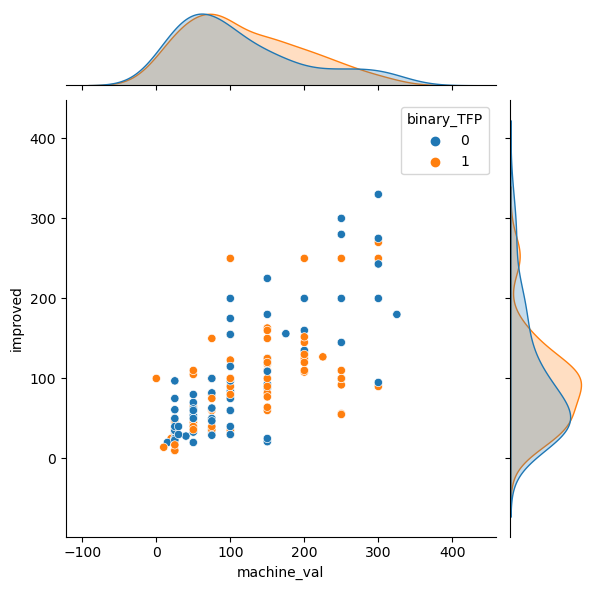

In [52]:
sns.jointplot(data=df, x='machine_val', y='improved', hue="binary_TFP")

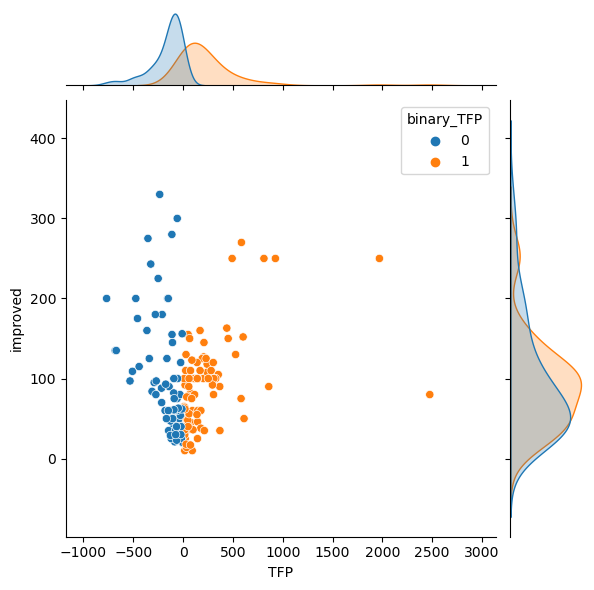

In [53]:
sns.jointplot(data=df, x='TFP', y='improved', hue="binary_TFP")

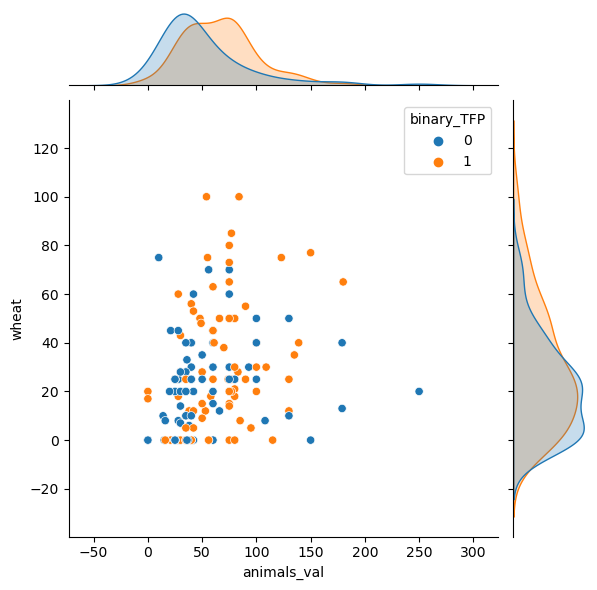

In [54]:
sns.jointplot(data=df, x='animals_val', y='wheat', hue="binary_TFP")

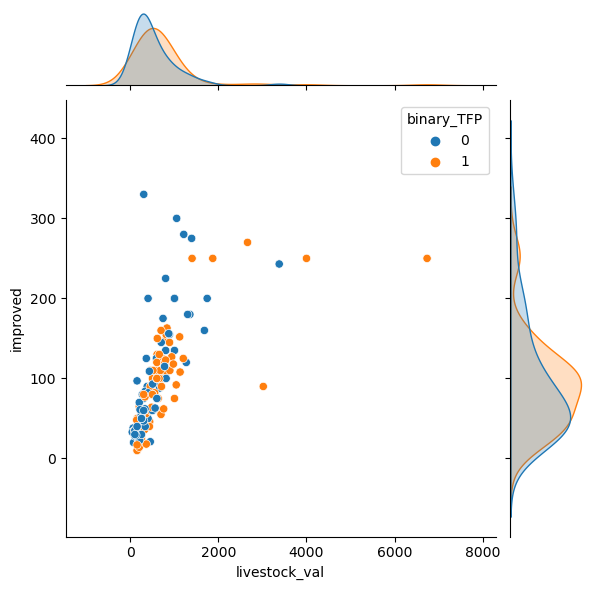

In [55]:
sns.jointplot(data=df, x='livestock_val', y='improved', hue="binary_TFP")

### generate diversification score, use as a regressor, dependent variable is still TFP
This section is moved to the diversification.ipynb

In [56]:
df3 = pd.read_csv('./1860final_w_TotalOutput.csv')

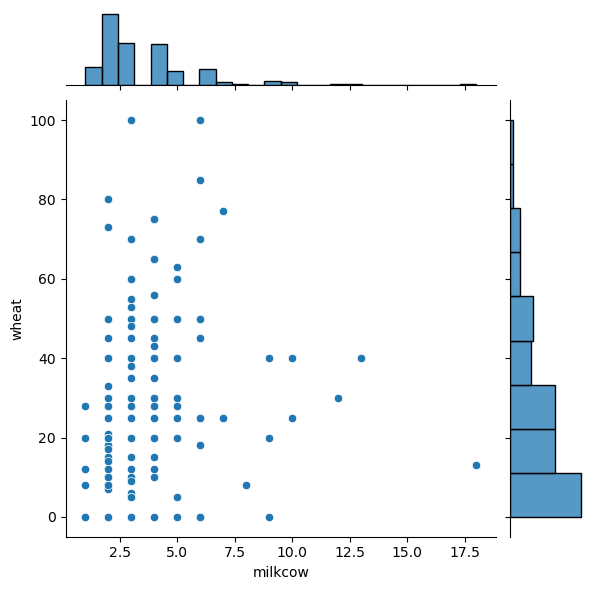

In [57]:
sns.jointplot(data=df3, x="milkcow", y="wheat")